# Modulo 3 Actividad 1

### Intención del aprendizaje esperado:

1. Utilizar los conceptos básicos de estadística descriptiva para la caracterización de un conjunto de datos de una población.

## Ejercicios Planteados

**Caso:**

En una clínica infantil se ha ido anotando, durante un mes, el número de metros que cada niño anda, seguido y sin caerse, el primer día que comienza a caminar, obteniéndose la tabla de información adjunta:

<img src="TablaFrecuencia3_1.jpg">

**Se pide:**


a) Tabla de Frecuencia. Diagrama de Barras para las frecuencias absolutas, relativas y acumuladas.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt


metros = []
ninnos = [2, 6, 10, 5, 10, 3, 2, 2]
tabla_registros = []


for i in range(1, 9):
    metros.append(i)

for metro, ninnos in zip(metros, ninnos):
    tabla_registros.extend([metro] * ninnos)

# Crear el DataFrame de la tabla de frecuencia
df_tabla_frecuencia = pd.DataFrame(tabla_registros, columns=['Metros'])

# Contar la frecuencia de cada metro y agregarlo como una columna
df_tabla_frecuencia['Niños'] = df_tabla_frecuencia.groupby('Metros')['Metros'].transform('count')

# Eliminar las filas duplicadas para obtener la tabla de frecuencia única
df_tabla_frecuencia = df_tabla_frecuencia.drop_duplicates().reset_index(drop=True)

print(df_tabla_frecuencia)



   Metros  Niños
0       1      2
1       2      6
2       3     10
3       4      5
4       5     10
5       6      3
6       7      2
7       8      2


In [22]:
cantidad_ninnos = len(tabla_registros)

df_tabla_frecuencia['Frecuencia Relativa'] =  df_tabla_frecuencia['Niños'] / cantidad_ninnos
df_tabla_frecuencia['Frecuencia Acumulada'] = df_tabla_frecuencia['Niños'].cumsum()

df_tabla_frecuencia



,Metros,Niños,Frecuencia Relativa,Frecuencia Acumulada
0,1,2,0.050,2
1,2,6,0.150,8
2,3,10,0.250,18
3,4,5,0.125,23
4,5,10,0.250,33
5,6,3,0.075,36
6,7,2,0.050,38
7,8,2,0.050,40


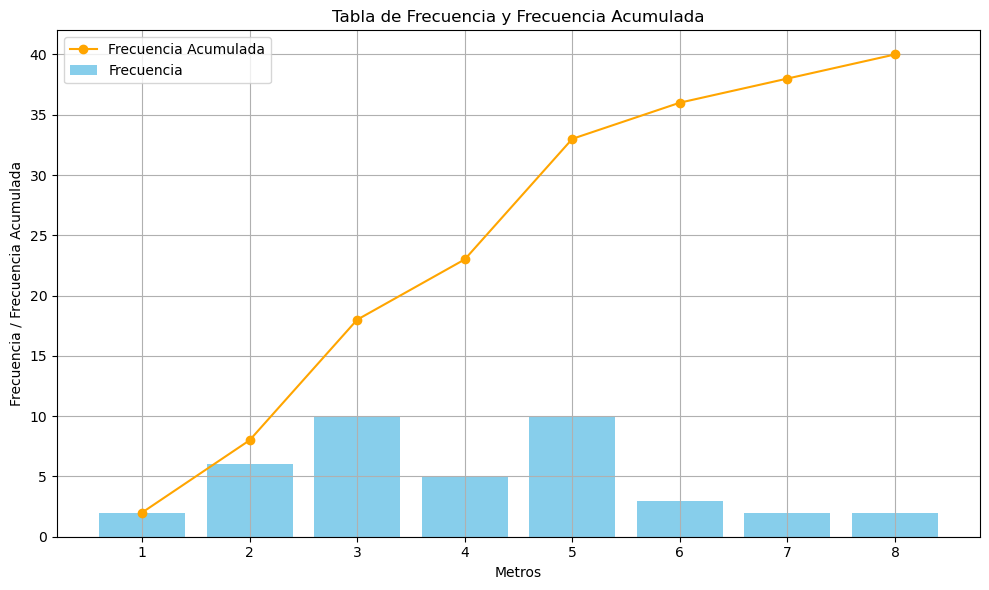

In [25]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
ax.bar(df_tabla_frecuencia['Metros'], df_tabla_frecuencia['Niños'], color='skyblue', label='Frecuencia')
ax.plot(df_tabla_frecuencia['Metros'], df_tabla_frecuencia['Frecuencia Acumulada'], color='orange', marker='o', label='Frecuencia Acumulada', linestyle='-')

# Personalizar el gráfico
ax.set_xlabel('Metros')
ax.set_ylabel('Frecuencia / Frecuencia Acumulada')
ax.set_title('Tabla de Frecuencia y Frecuencia Acumulada')
ax.set_xticks(df_tabla_frecuencia['Metros'])
ax.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()